# HOMEWORK 5

In this homework you are going to implement the **Floyd-Steinberg dithering** algorithm. Dithering, in general, means that we are adding noise to the signal (in our case digital image) in order to perceive it better. In other words, by adding the noise the objective quality will be worse but the subjective quality will be better (i.e. the image will "look" better).

The details of FS dithering can be found in this [wiki](https://en.wikipedia.org/wiki/Floyd%E2%80%93Steinberg_dithering) page. In order to implement the dithering, we will implement the following steps:
* Define colour pallette
* Quantize the image to obtain the baseline and compute the average quantization error
* Implement FS dithering and compute the average quantization error

You will also have to answer the question at the end of this notebook.

Note: In this homework, you will have the chance to earn some extra points. See the "Bonus" section at the end of the notebook. Good luck!

As always, you are encouraged to use your own images :-)

In [1]:
import cv2
import math
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

Let's load the image.

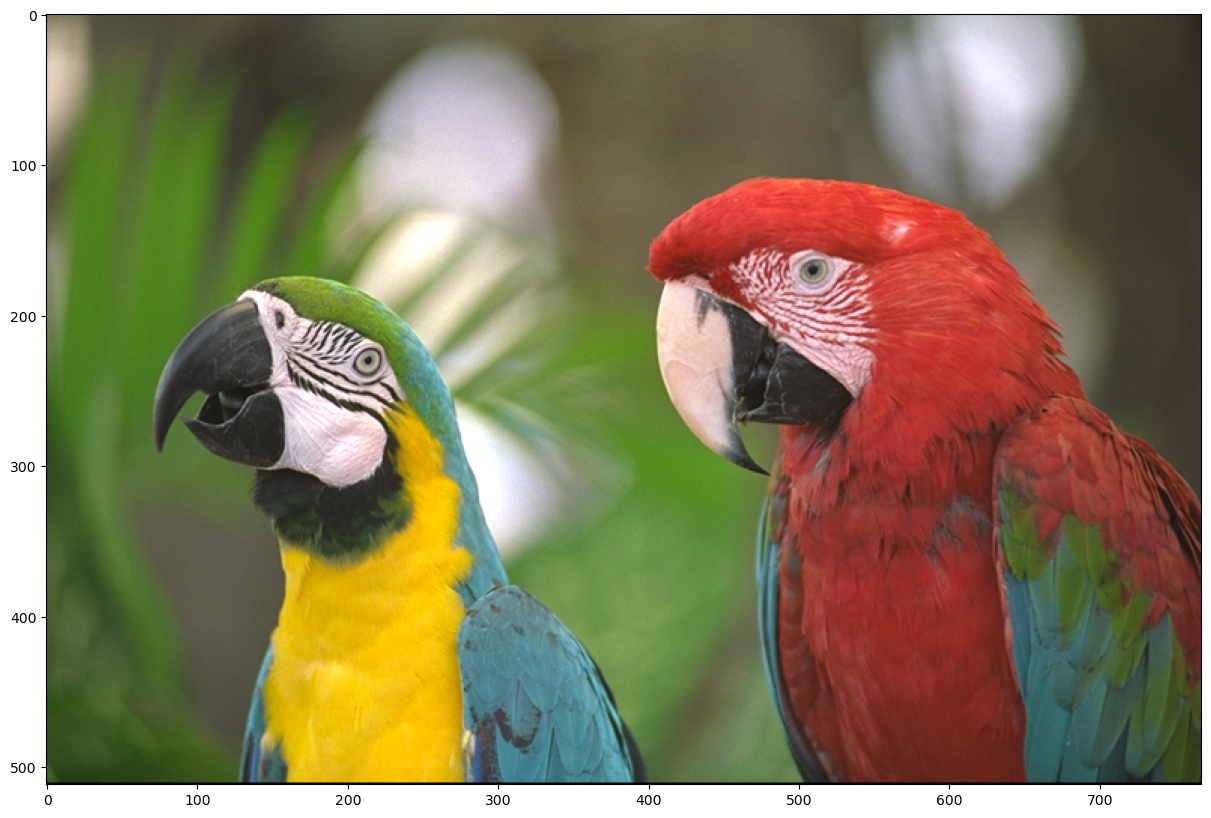

In [3]:
# Load image
img = cv2.imread('../data/kodim23.png')
# Convert it to RGB
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# Plot it
plt.imshow(img)

Let's start with gray tones first.

In [6]:
# Black, dark gray, light gray, white
colors = np.array([[0, 0, 0],
                   [64, 64, 64],
                   [192, 192, 192],
                   [255, 255, 255]])

Using the colour pallette, let's quantize the original image.

In [26]:
# Function to compute Euclidean distance
def euclidean_dist(color1, color2):
    return np.sqrt(np.sum((color1 - color2) ** 2))

# Function to find the closest pixel from the colours palette
def find_closest_color(pixel, palette):
    distances = [euclidean_dist(pixel, color) for color in palette]
    return palette[np.argmin(distances)]

# Function for quantization
def quantize_image(image, palette):
    # Prepare for quantization
    rows, cols, channels = image.shape
    quantized = np.zeros_like(image)

    # Apply quantization
    for r in range(rows):
        for c in range(cols):
            # Extract the original pixel value
            pixel = list(image[r, c, :])

            # Find the closest colour from the palette (using the find_closest_color function)
            new_pixel = find_closest_color(pixel, palette)

            # Apply quantization
            quantized[r, c, :] = new_pixel

    return quantized

# Apply quantization
quantized = quantize_image(img.astype(np.float32), colors)

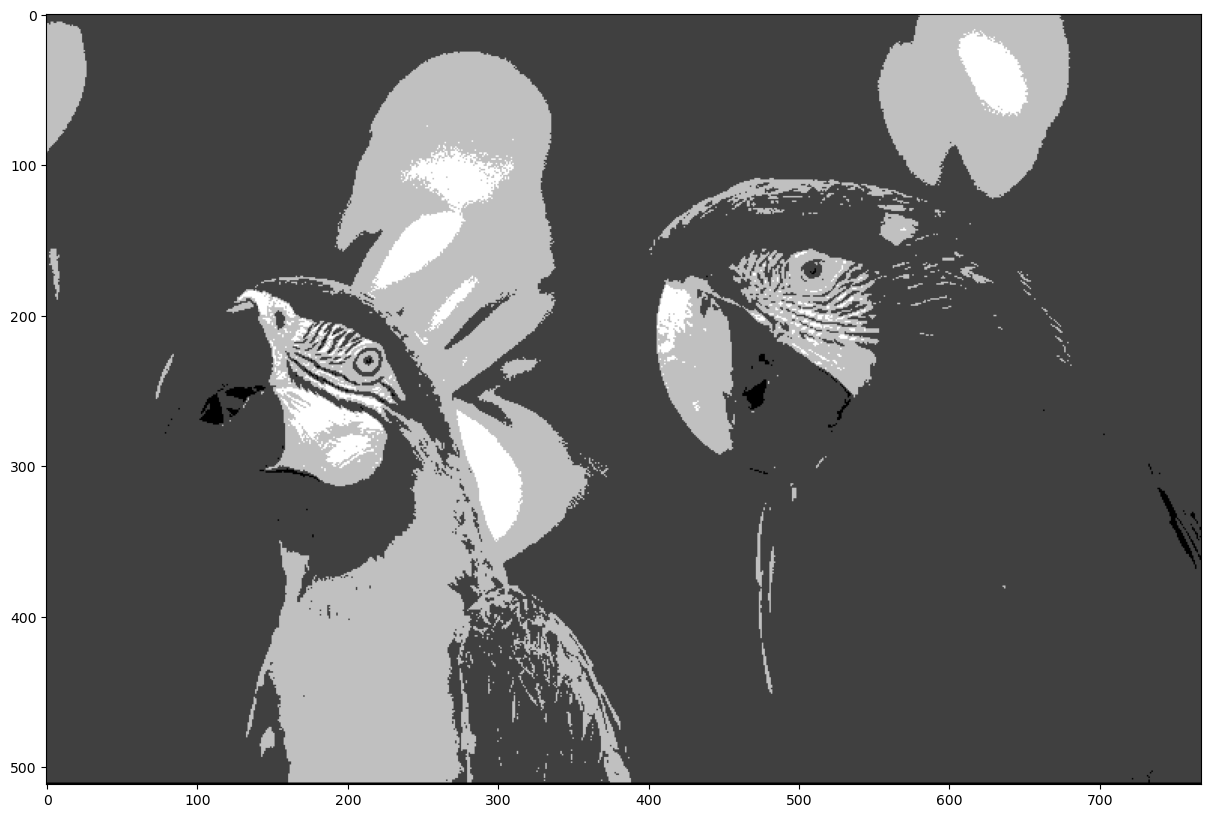

In [27]:
# Show quantized image (don't forget to cast back to uint8)
plt.imshow(quantized.astype(np.uint8))

In [16]:
# Compute average quantization error TODO here
avg_quant_error = np.mean(abs(img - quantized))
print("Average quantization error: {:.2f}".format(avg_quant_error))

Average quantization error: 32.76


#### Floyd-Steinberg Dithering
We are now going to implement the FS dithering and compare it to the optimally quantized image we have calculated above.

In [29]:
def apply_floyd_steinberg_dithering(image, palette):
    # Make a temporal copy of the original image, we will need it for error diffusion
    img_tmp = np.copy(image)
    dithering_result = np.zeros_like(image)

    error_diffusion = np.array([[0, 0, 7],
                                [3, 5, 1]]) / 16.0

    rows, cols, channels = image.shape

    for r in range(1, rows - 1):
        for c in range(1, cols - 1):
            # Extract the original pixel value
            pixel = list(img_tmp[r, c, :])

            # Find the closest colour from the palette
            new_pixel = find_closest_color(pixel, palette)

            # Compute quantization error
            quant_error = pixel - new_pixel

            # Apply the quantization error according to the FS diffusion matrix
            for dr, row_weight in enumerate(error_diffusion):
                for dc, weight in enumerate(row_weight):
                    img_tmp[r + dr, c + (dc - 1), :] += quant_error * weight

            # Apply dithering
            dithering_result[r, c, :] = new_pixel

    return dithering_result

# Applying the dithering function
dithering = apply_floyd_steinberg_dithering(img, colors)

(<Axes: >, <matplotlib.image.AxesImage at 0x15a038a50>)

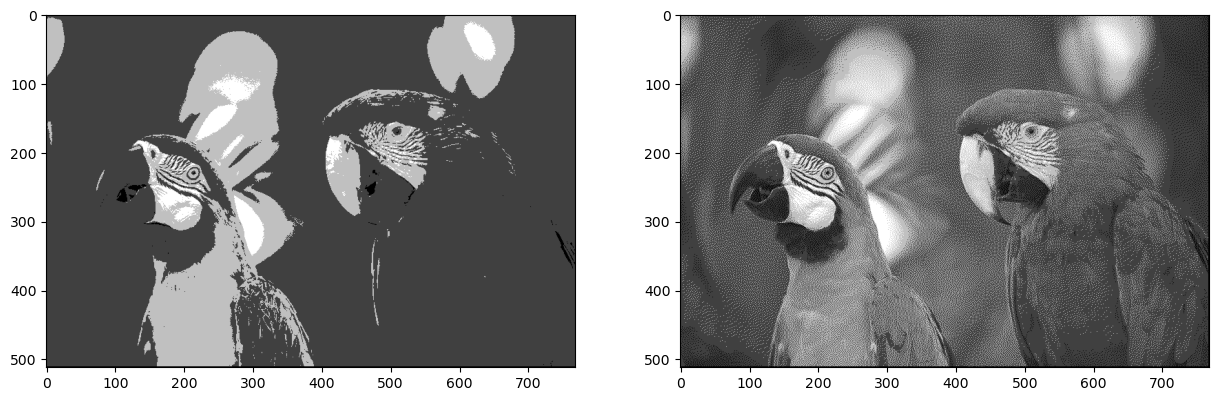

In [30]:
# Show quantized image (don't forget to cast back to uint8)
plt.subplot(121), plt.imshow(quantized.astype(np.uint8))   # optimally quantized
plt.subplot(122), plt.imshow(dithering.astype(np.uint8))   # dithering

In [15]:
# Compute average quantization error for dithered image
avg_dith_error = np.mean(abs(img - dithering))
print("Average quantization error for FS: {:.2f}".format(avg_dith_error))

Average quantization error for FS: 41.83


### Questions
* Which image has higher quantization error? Optimally quantized or dithered? Optimally quantized.
* Which image looks better to you? Dithered.
* Can you repeat the same process using only two colours: black and white? Show me :-)


(<Axes: >, <matplotlib.image.AxesImage at 0x15a291950>)

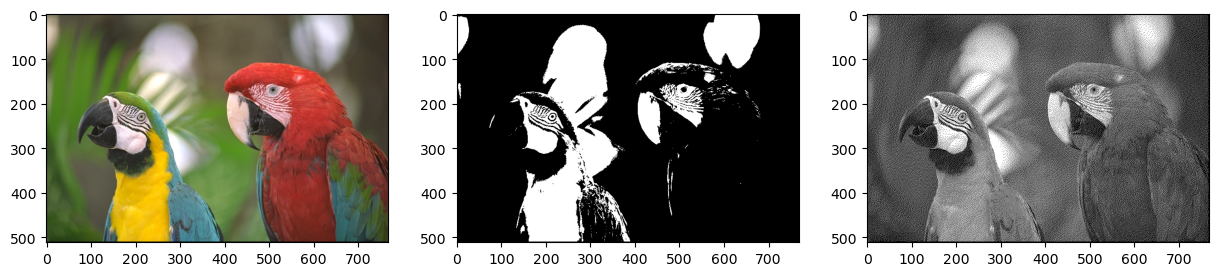

In [32]:
colors_bw = np.array(
    [
        [0, 0, 0],
        [255, 255, 255]
    ])

img2 = cv2.imread('../data/kodim23.png')
# Convert it to RGB
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
# Plot it

quantized = quantize_image(img2.astype(np.float32), colors_bw)
dithered = apply_floyd_steinberg_dithering(img2.astype(np.float32), colors_bw)
plt.subplot(131), plt.imshow(img2)
plt.subplot(132), plt.imshow(quantized.astype(np.uint8)) # optimally quantized
plt.subplot(133), plt.imshow(dithered.astype(np.uint8)) # dithered



### Bonus Points

Repeat the homework using a diffrerent image pallette. For instance, you can use an optimal colour
pallette that we can calculate via k-means algorithm. The following snippet of code will give you the 16
optimal colours for your original image.

(<Axes: >, <matplotlib.image.AxesImage at 0x2c93ca710>)

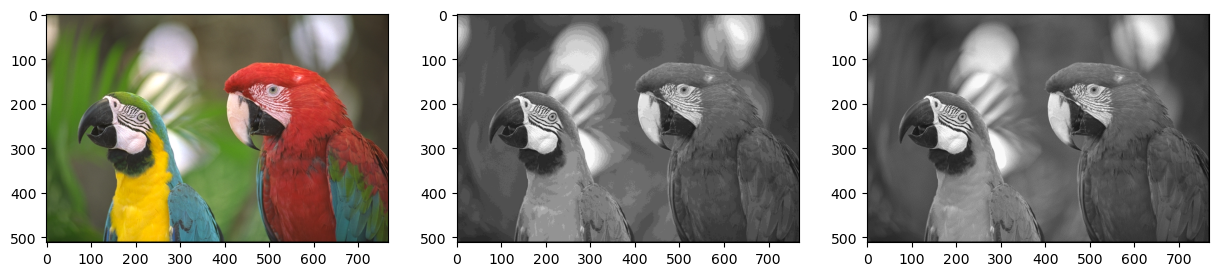

In [35]:
from sklearn.cluster import KMeans

img3 = cv2.imread('../data/kodim23.png')
# Convert it to RGB
img3 = cv2.cvtColor(img3, cv2.COLOR_BGR2RGB)

kmeans = KMeans(n_clusters=16).fit(np.reshape(img3, (-1, 1)))
colors_kmeans = kmeans.cluster_centers_

# Plot it

quantized = quantize_image(img3.astype(np.float32), colors_kmeans)
dithered = apply_floyd_steinberg_dithering(img3.astype(np.float32), colors_kmeans)
plt.subplot(131), plt.imshow(img3)
plt.subplot(132), plt.imshow(quantized.astype(np.uint8)) # optimally quantized
plt.subplot(133), plt.imshow(dithered.astype(np.uint8)) # dithered

Apply FS dithering the same way you did before.
* How does the result look like to you? Better
* What happens if we use 32 colours? Prolly even better
* And what happens if we use 256 colours? I guess for both these cases will be hard to determine the difference between dithering and quant with naked eye